<a href="https://colab.research.google.com/github/FSegurado/lia1_2024_1/blob/main/Entregas%20-%20Felipe%20Segurado/Ciencia_de_Dados_Opendata_AIG_Brazil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Ciência de Dados - Opendata AIG Brazil**
#Dados de ocorrências aeronáuticas da aviação civil brasileira.
Constam nesta base de dados as ocorrências aeronáuticas notificadas ao CENIPA no anos de 2010 a 2021 que ocorreram em solo brasileiro.

Dentre as informações disponíveis estão os dados sobre as aeronaves envolvidas, fatalidades, local, data, horário dos eventos e informações taxonômicas típicas das investigações de acidente


**Serão 6 perguntas e 2 desafios! #borafazer**

In [5]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import chardet

**Carregando os dados**

In [6]:
# Carrega o dataset
df_ss = pd.read_csv('https://raw.githubusercontent.com/FSegurado/lia1_2024_1/main/Aula10/aeronave.csv')

In [7]:
# Shape
df_ss.shape

(763, 23)

In [8]:
# Amostra dos dados
df_ss.head()

,codigo_ocorrencia2,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,...,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total
0,83097,PRHDB,***,HELICÓPTERO,ROBINSON HELICOPTER,R44,R44,PISTÃO,MONOMOTOR,1088,...,BRASIL,BRASIL,HELICÓPTERO,PARTICULAR,CAMPO DE MARTE - SP,MAROUM,CRUZEIRO,***,SUBSTANCIAL,4
1,83085,PTEEK,***,AVIÃO,EMBRAER,EMB-810C,PA34,PISTÃO,BIMOTOR,2073,...,BRASIL,BRASIL,AVIÃO,TÁXI AÉREO,FAZENDA ÁGUA LIMPA,PLÁCIDO DE CASTRO,TÁXI,NÃO REGULAR,LEVE,0
2,83074,PSAEN,***,AVIÃO,EMBRAER,ERJ 190-400,E295,JATO,BIMOTOR,61200,...,BRASIL,BRASIL,AVIÃO,REGULAR,VIRACOPOS,TANCREDO NEVES,INDETERMINADA,REGULAR,NENHUM,0
3,83063,PRGZW,***,AVIÃO,BOEING COMPANY,737-86N,B738,NaN,BIMOTOR,79015,...,BRASIL,BRASIL,AVIÃO,REGULAR,GOVERNADOR ANDRÉ FRANCO MONTORO,PRESIDENTE JUSCELINO KUBITSCHEK,POUSO,REGULAR,NENHUM,0
4,83051,PRPDP,***,***,ATR - GIE AVIONS DE TRANSPORT RÉGIONAL,ATR-42-500,AT45,TURBOÉLICE,BIMOTOR,18600,...,BRASIL,BRASIL,***,REGULAR,PORTO URUCU,CARAUARI,TÁXI,REGULAR,NENHUM,0


In [9]:
# Amostra dos dados
df_ss.tail()

,codigo_ocorrencia2,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,...,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total
758,82174,PSAED,***,AVIÃO,YABORA INDUSTRIA AERONAUTICA S.A,ERJ 190-400,E295,JATO,BIMOTOR,61500,...,BRASIL,BRASIL,AVIÃO,REGULAR,VIRACOPOS,CAMPO GRANDE,POUSO,REGULAR,NENHUM,0
759,82173,PSAEP,***,AVIÃO,EMBRAER,ERJ 190-400,E179,JATO,BIMOTOR,61200,...,BRASIL,BRASIL,AVIÃO,REGULAR,VIRACOPOS,CAMPO GRANDE,DECOLAGEM,REGULAR,NENHUM,0
760,82172,PRMHA,***,AVIÃO,AIRBUS INDUSTRIE,A320-214,A320,JATO,BIMOTOR,77000,...,BRASIL,BRASIL,AVIÃO,REGULAR,CAMPO GRANDE,GOVERNADOR ANDRÉ FRANCO MONTORO,APROXIMAÇÃO FINAL,REGULAR,NENHUM,0
761,82171,PRGIH,***,AVIÃO,BOEING COMPANY,737-76N,B737,JATO,BIMOTOR,70080,...,BRASIL,BRASIL,AVIÃO,REGULAR,SANTOS DUMONT,CONGONHAS,CRUZEIRO,REGULAR,***,0
762,82170,PRYSC,***,AVIÃO,AIRBUS S.A.S.,A320-251N,***,JATO,TRIMOTOR,0,...,BRASIL,BRASIL,AVIÃO,REGULAR,DEPUTADO LUÍS EDUARDO MAGALHÃES,GUARARAPES - GILBERTO FREYRE,DECOLAGEM,REGULAR,NENHUM,0


**Análise exploratória**

In [10]:
# Colunas do conjunto de dados
df_ss.columns

Index(['codigo_ocorrencia2', 'aeronave_matricula',
       'aeronave_operador_categoria', 'aeronave_tipo_veiculo',
       'aeronave_fabricante', 'aeronave_modelo', 'aeronave_tipo_icao',
       'aeronave_motor_tipo', 'aeronave_motor_quantidade', 'aeronave_pmd',
       'aeronave_pmd_categoria', 'aeronave_assentos',
       'aeronave_ano_fabricacao', 'aeronave_pais_fabricante',
       'aeronave_pais_registro', 'aeronave_registro_categoria',
       'aeronave_registro_segmento', 'aeronave_voo_origem',
       'aeronave_voo_destino', 'aeronave_fase_operacao',
       'aeronave_tipo_operacao', 'aeronave_nivel_dano',
       'aeronave_fatalidades_total'],
      dtype='object')

In [11]:
# Verificando o tipo de dado de cada coluna
df_ss.dtypes

codigo_ocorrencia2               int64
aeronave_matricula              object
aeronave_operador_categoria     object
aeronave_tipo_veiculo           object
aeronave_fabricante             object
aeronave_modelo                 object
aeronave_tipo_icao              object
aeronave_motor_tipo             object
aeronave_motor_quantidade       object
aeronave_pmd                     int64
aeronave_pmd_categoria           int64
aeronave_assentos              float64
aeronave_ano_fabricacao        float64
aeronave_pais_fabricante        object
aeronave_pais_registro          object
aeronave_registro_categoria     object
aeronave_registro_segmento      object
aeronave_voo_origem             object
aeronave_voo_destino            object
aeronave_fase_operacao          object
aeronave_tipo_operacao          object
aeronave_nivel_dano             object
aeronave_fatalidades_total       int64
dtype: object

In [12]:
# Resumo estatístico da coluna com o Tipo de Motor da aeronave
df_ss['aeronave_motor_tipo'].describe()

count      693
unique       5
top       JATO
freq       449
Name: aeronave_motor_tipo, dtype: object

In [13]:
# Verificando se há registros duplicados
df_ss[df_ss.duplicated()]

,codigo_ocorrencia2,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,...,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total


In [14]:
# Verificando de há valores ausentes
df_ss.isnull().sum()

codigo_ocorrencia2               0
aeronave_matricula               0
aeronave_operador_categoria      0
aeronave_tipo_veiculo            0
aeronave_fabricante              1
aeronave_modelo                  1
aeronave_tipo_icao               1
aeronave_motor_tipo             70
aeronave_motor_quantidade        0
aeronave_pmd                     0
aeronave_pmd_categoria           0
aeronave_assentos              121
aeronave_ano_fabricacao         46
aeronave_pais_fabricante         0
aeronave_pais_registro           0
aeronave_registro_categoria      0
aeronave_registro_segmento       0
aeronave_voo_origem              0
aeronave_voo_destino             0
aeronave_fase_operacao           0
aeronave_tipo_operacao           0
aeronave_nivel_dano              0
aeronave_fatalidades_total       0
dtype: int64

In [15]:
# Algumas células possuem *** para representar que está vazia. Apagando:

# Substituir *** por NaN
df_ss.replace(['***'], pd.NaT, inplace=True)


In [16]:
# Reverificando de há valores ausentes
df_ss.isnull().sum()

codigo_ocorrencia2               0
aeronave_matricula               0
aeronave_operador_categoria    763
aeronave_tipo_veiculo           20
aeronave_fabricante              7
aeronave_modelo                  7
aeronave_tipo_icao              88
aeronave_motor_tipo            154
aeronave_motor_quantidade       51
aeronave_pmd                     0
aeronave_pmd_categoria           0
aeronave_assentos              121
aeronave_ano_fabricacao         46
aeronave_pais_fabricante         0
aeronave_pais_registro           0
aeronave_registro_categoria     20
aeronave_registro_segmento     161
aeronave_voo_origem              0
aeronave_voo_destino             0
aeronave_fase_operacao           0
aeronave_tipo_operacao           3
aeronave_nivel_dano             20
aeronave_fatalidades_total       0
dtype: int64

## **1. Calcule a distribuição de tipos de aeronaves (aeronave_tipo_veiculo) e represente-a graficamente.**

In [44]:
# Distribuição do tipos de motores
tipo_veiculo_count = df_ss['aeronave_tipo_veiculo'].value_counts()


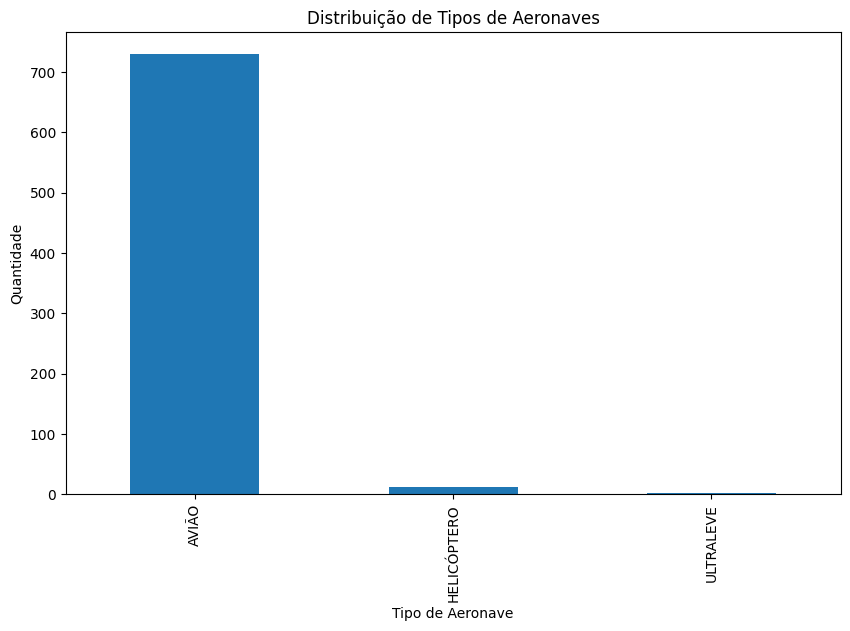

In [37]:
# Plot
tipo_veiculo_count.plot(kind='bar', figsize=(10, 6))
plt.title('Distribuição de Tipos de Aeronaves')
plt.xlabel('Tipo de Aeronave')
plt.ylabel('Quantidade')
plt.show()

## **2. Identifique os cinco principais fabricantes (aeronave_fabricante) com base na quantidade de aeronaves no dataset.**
Apresente o resultado em um gráfico de barras.

In [39]:
# Top 5 fabricantes
top_fabricantes = df_ss['aeronave_fabricante'].value_counts().head(5)
print(top_fabricantes)


aeronave_fabricante
BOEING COMPANY             184
AIRBUS INDUSTRIE           152
AIRBUS S.A.S.               94
EMBRAER                     87
AEROSPATIALE AND ALENIA     42
Name: count, dtype: int64


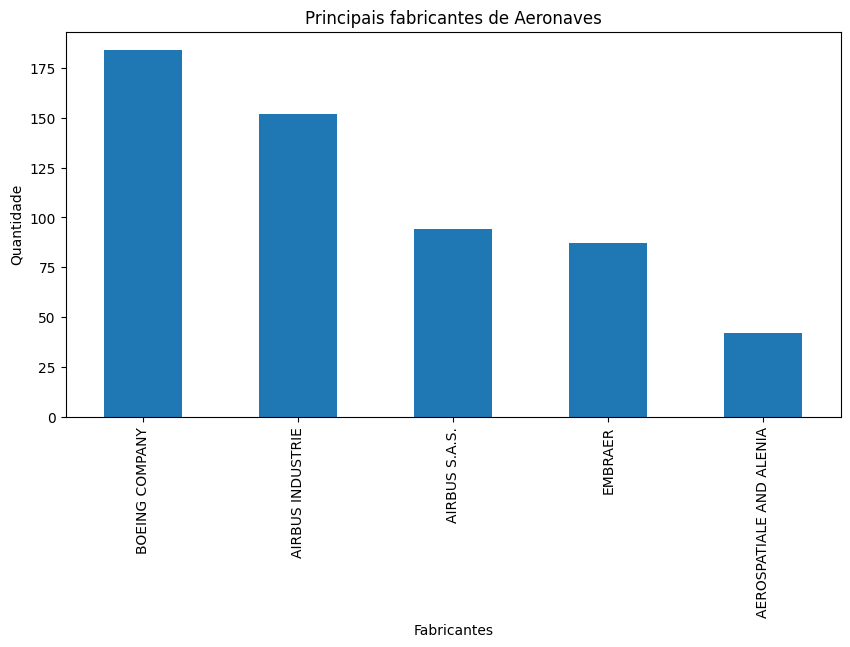

In [43]:
# Plot
top_fabricantes.plot(kind='bar', figsize=(10, 5))
plt.title('Principais fabricantes de Aeronaves')
plt.xlabel('Fabricantes')
plt.ylabel('Quantidade')
plt.show()

## **3. Verifique a distribuição de tipos de motores (aeronave_motor_tipo) utilizados nas aeronaves. Qual é o tipo de motor mais comum?**

Apresente o resultado em um gráfico de barras.

In [47]:
# Distribuição de tipos de motores
motor_tipo_count = df_ss['aeronave_motor_tipo'].value_counts()

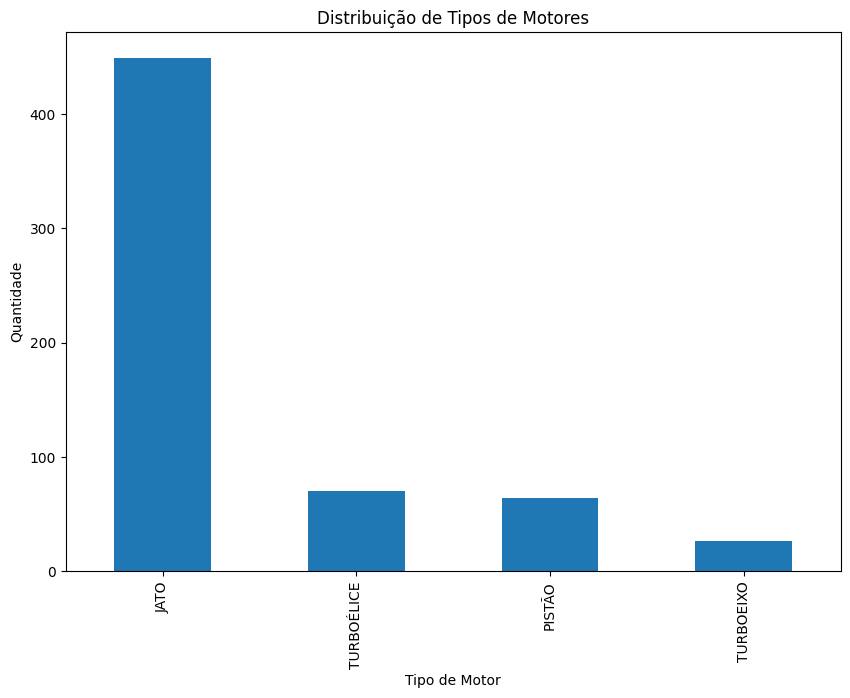

In [51]:
# Plot
motor_tipo_count.plot(kind='bar', figsize=(10, 7))
plt.title('Distribuição de Tipos de Motores')
plt.xlabel('Tipo de Motor')
plt.ylabel('Quantidade')
plt.show()

## **4. Avalie a relação entre o país de fabricação (aeronave_pais_fabricante) e o país de registro (aeronave_pais_registro) das aeronaves. Identifique quais países têm a maioria das aeronaves fabricadas e registradas.?**

Apresente o resultado em um gráfico de barras.

In [52]:
# Relação entre país de fabricação e registro
pais_relacao = df_ss.groupby(['aeronave_pais_fabricante', 'aeronave_pais_registro']).size().reset_index(name='Quantidade')
print(pais_relacao.head())

  aeronave_pais_fabricante aeronave_pais_registro  Quantidade
0                  BOLÍVIA                BOLÍVIA           1
1                   BRASIL                 BRASIL         750
2                    CHILE                  CHILE           2
3                 COLÔMBIA               COLÔMBIA           1
4           ESTADOS UNIDOS         ESTADOS UNIDOS           6


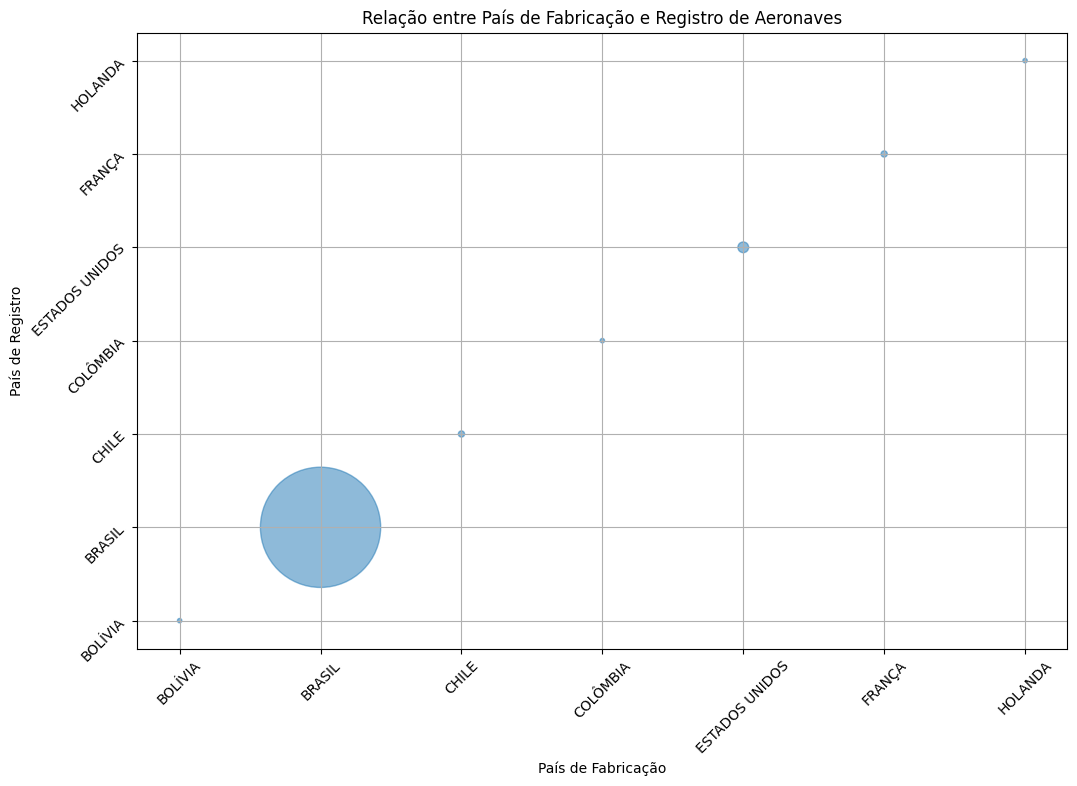

In [54]:
# Plotar gráfico de dispersão
plt.figure(figsize=(12, 8))
plt.scatter(pais_relacao['aeronave_pais_fabricante'], pais_relacao['aeronave_pais_registro'], s=pais_relacao['Quantidade']*10, alpha=0.5)
plt.title('Relação entre País de Fabricação e Registro de Aeronaves')
plt.xlabel('País de Fabricação')
plt.ylabel('País de Registro')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.grid(True)
plt.show()

## **5. Analise as fases de operação das aeronaves (aeronave_fase_operacao) e identifique as três fases mais frequentes.**

Apresente os resultados em uma tabela ou gráfico.

In [61]:
# 3 Fases de operação mais frequentes
fase_operacao_count = df_ss['aeronave_fase_operacao'].value_counts().head(3)
print(fase_operacao_count)


aeronave_fase_operacao
POUSO                315
DECOLAGEM            245
APROXIMAÇÃO FINAL     87
Name: count, dtype: int64


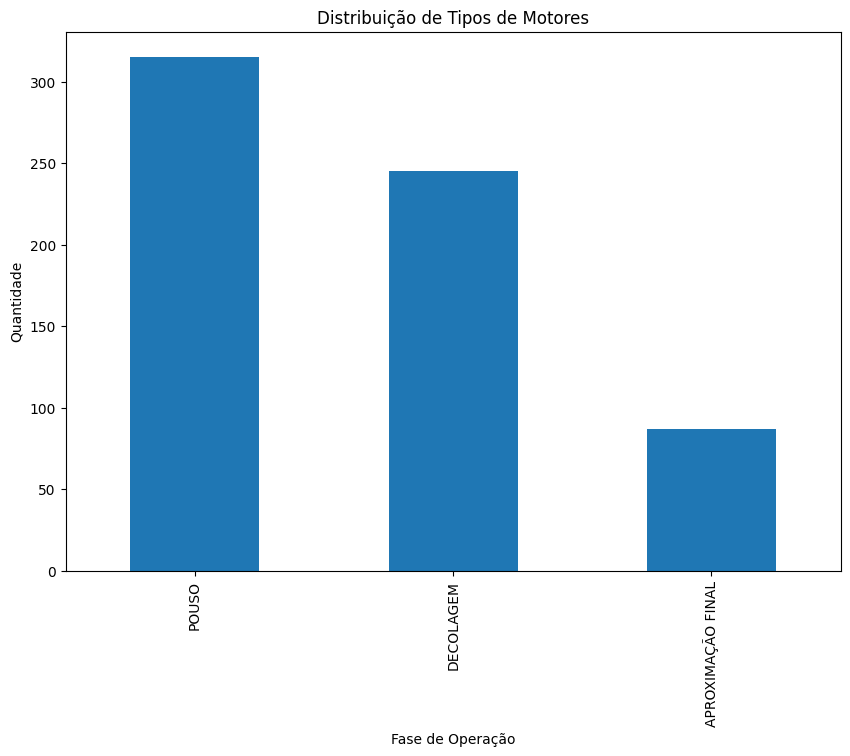

In [62]:
# Plot
fase_operacao_count.plot(kind='bar', figsize=(10, 7))
plt.title('Distribuição de Tipos de Motores')
plt.xlabel('Fase de Operação')
plt.ylabel('Quantidade')
plt.show()

## **6. Compare o número de fatalidades (aeronave_fatalidades_total) em relação ao tipo de operação (aeronave_tipo_operacao). Qual tipo de operação tem o maior número médio de fatalidades?**
Apresente os resultados em uma tabela ou gráfico.

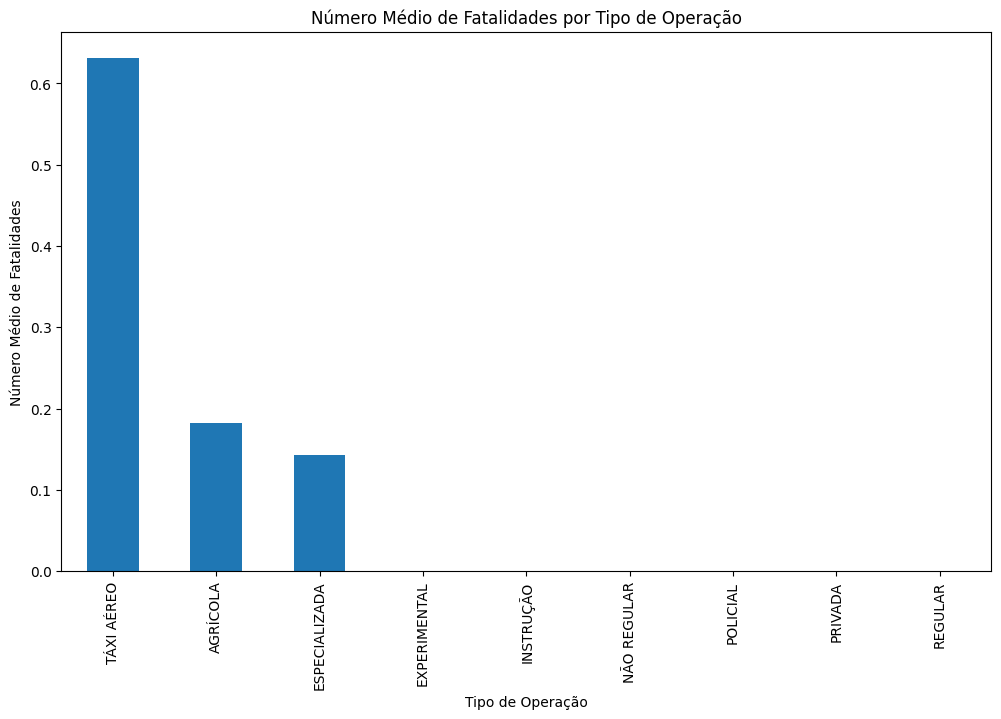

In [77]:
# Número médio de fatalidades por tipo de operação
fatalidades_media_por_operacao = df_ss.groupby('aeronave_tipo_operacao')['aeronave_fatalidades_total'].mean().sort_values(ascending=False)

# Plot
fatalidades_media_por_operacao.plot(kind='bar', figsize=(12, 7))
plt.title('Número Médio de Fatalidades por Tipo de Operação')
plt.xlabel('Tipo de Operação')
plt.ylabel('Número Médio de Fatalidades')
plt.show()


In [79]:
# Tipo de operação com o maior número médio de fatalidades
maior_fatalidades_media = fatalidades_media_por_operacao.idxmax()
valor_maior_fatalidades_media = fatalidades_media_por_operacao.max()

print("Tipo de operação com o maior número médio de fatalidades:", maior_fatalidades_media)
print("Valor do maior número médio de fatalidades:", valor_maior_fatalidades_media)


Tipo de operação com o maior número médio de fatalidades: TÁXI AÉREO
Valor do maior número médio de fatalidades: 0.631578947368421


## **Desafio 1 - Nível Júnior**

Desejamos compreender a diversidade de anos de fabricação das aeronaves de diferentes fabricantes. Você deve:

  Agrupar as aeronaves por fabricante e contar a quantidade de anos de fabricação únicos para cada um.

  Identificar e listar os fabricantes que possuem aeronaves fabricadas em mais de cinco anos diferentes.

  Visualizar essa distribuição, destacando os fabricantes e os anos de fabricação com aeronaves em mais de cinco anos diferentes.



In [81]:
# Agrupar as aeronaves por fabricante e contar a quantidade de anos de fabricação únicos para cada um
fabricante_ano_count = df_ss.groupby('aeronave_fabricante')['aeronave_ano_fabricacao'].nunique()

In [82]:
# Identificar e listar os fabricantes com aeronaves fabricadas em mais de cinco anos diferentes
fabricantes_diferentes = fabricante_ano_count[fabricante_ano_count > 5]

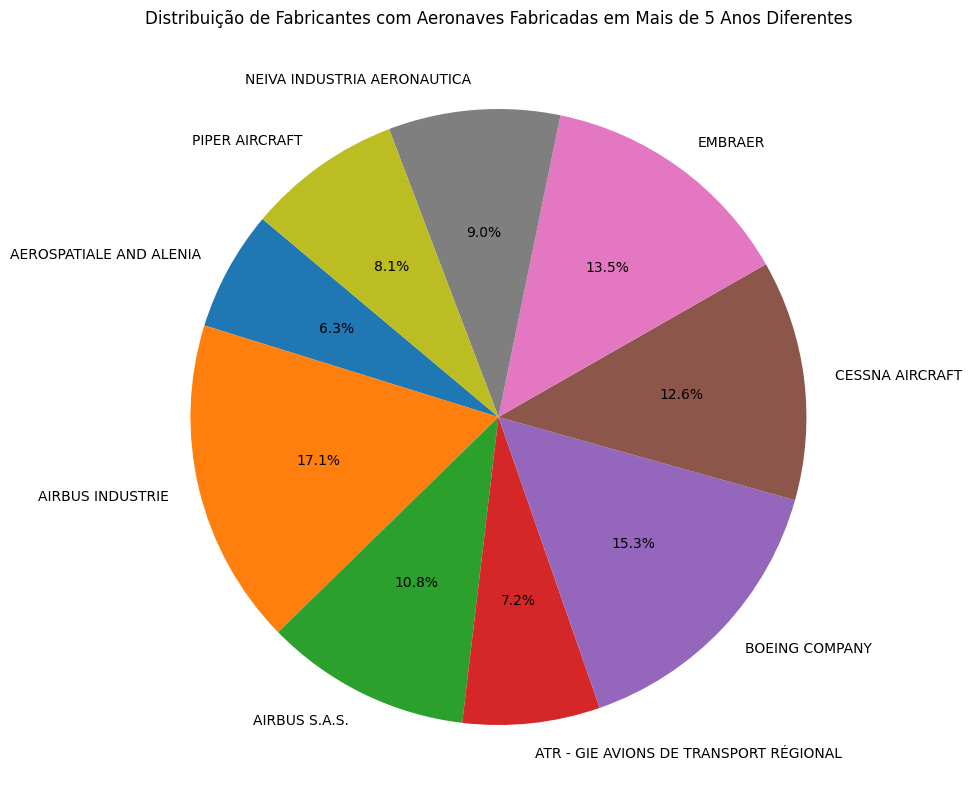

In [83]:
# Plotar gráfico de pizza
fabricantes_diferentes.plot(kind='pie', figsize=(10, 10), autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de Fabricantes com Aeronaves Fabricadas em Mais de 5 Anos Diferentes')
plt.ylabel('')  # Remove o label do eixo y
plt.show()

## **Desafio 2 - Nível Master**

Vamos investigar a distribuição temporal dos incidentes de aeronaves, focando nos tipos de operação mais incidentes. Você deve:

  Agrupar os incidentes de aeronaves por ano e tipo de operação, contando o número de incidentes para cada combinação.

  Selecionar os três tipos de operação com mais incidentes ao longo do tempo.

  Visualizar a evolução temporal desses incidentes, destacando os anos e os tipos de operação selecionados.

In [88]:
# Antes de tudo, Excluir registros com aeronave_ano_fabricacao igual a 0
df_ss = df_ss[df_ss['aeronave_ano_fabricacao'] != 0]

In [89]:
# Selecionar os três tipos de operação com mais incidentes ao longo do tempo
top_operacoes = df_ss['aeronave_tipo_operacao'].value_counts().nlargest(3).index

In [90]:
# Filtrar o DataFrame para incluir apenas as três operações mais incidentes
df_top_operacoes = df_ss[df_ss['aeronave_tipo_operacao'].isin(top_operacoes)]

In [91]:
# Agrupar os incidentes por ano e tipo de operação e contar o número de incidentes para cada combinação
incidentes_por_ano_operacao = df_top_operacoes.groupby(['aeronave_ano_fabricacao', 'aeronave_tipo_operacao']).size().unstack().fillna(0)

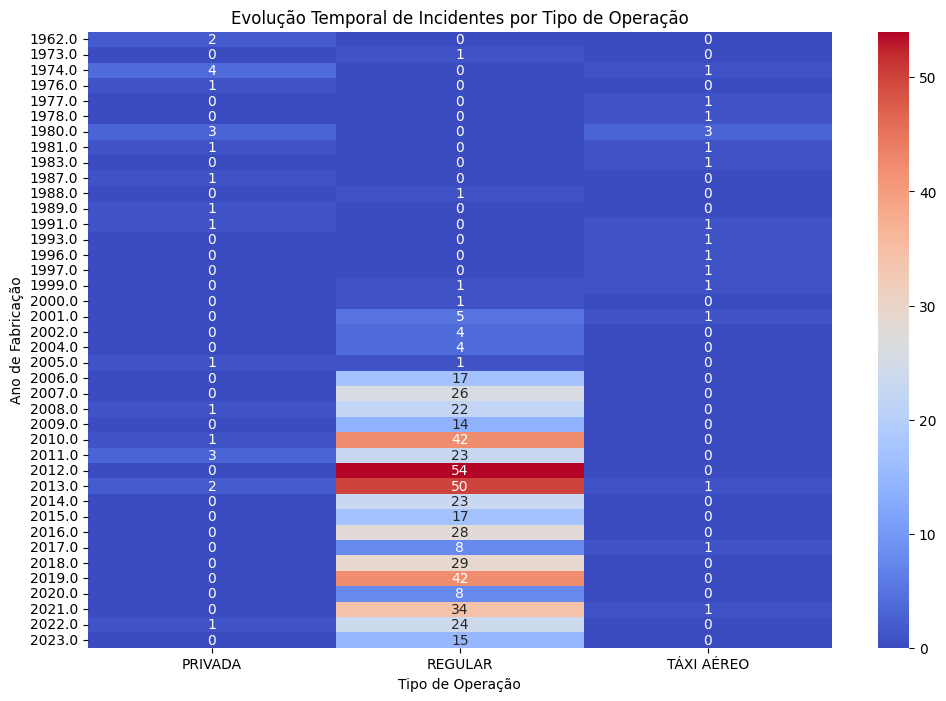

In [92]:
# Plotar heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(incidentes_por_ano_operacao, annot=True, cmap='coolwarm', fmt='g')
plt.title('Evolução Temporal de Incidentes por Tipo de Operação')
plt.xlabel('Tipo de Operação')
plt.ylabel('Ano de Fabricação')
plt.show()

## **Fim**